# Traffic Signs Recognition using CNN

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# from keras.models import Sequential, load_model
# from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import layers, models
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

ModuleNotFoundError: No module named 'seaborn'

code reference:

https://github.com/deepak2233/Traffic-Signs-Recognition-using-CNN-Keras/blob/main/Model/Traffic%20Signs%20Recognition%20using%20CNN%20%26%20Keras%20with%2098%25%20Accuracy.ipynb

https://www.kaggle.com/code/osamaabidoo/98-accuracy-on-german-traffic-sign-recognition

## Dataset Overview

In [65]:
# Train.csv
train_csv_path = os.getcwd() + "\dataset\Train.csv"
train_df = pd.read_csv(train_csv_path, usecols=['ClassId', 'Path', 'Width', 'Height'])
train_df.head()

,Width,Height,ClassId,Path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [66]:
# Test.csv
test_csv_path = os.getcwd() + "\dataset\Test.csv"
test_df = pd.read_csv(test_csv_path, usecols=['ClassId', 'Path', 'Width', 'Height'])
test_df.head()

,Width,Height,ClassId,Path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [67]:
# Label Overview (from Kaggle)
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Load the Dataset

In [68]:
train_data = [] # X_train
train_labels = [] # X_test
classes = 43
train_path = os.getcwd() + "\dataset\Train"

for i in os.listdir(train_path):
    dir = train_path + '/' + i
    if os.path.isdir(dir):
        for j in os.listdir(dir):
            try:
                img_path = dir+ '/' +j
                img = cv2.imread(img_path,-1)
                # resize all images to 30,30
                img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
                train_data.append(img)
                train_labels.append(i)
            except Exception as e:
                print(e)    
train_data = np.array(train_data)
train_labels = np.array(train_labels)
print(train_data.shape, train_labels.shape)

(39209, 30, 30, 3) (39209,)


In [69]:
test_data = [] # y_train
test_labels = [] # y_test
test_path = os.getcwd() + "\dataset\Test"

for index, row in test_df.iterrows():
    img_path = os.getcwd() + "\dataset/" + row['Path']
    img = cv2.imread(img_path, -1)
    img = cv2.resize(img, (30,30), interpolation=cv2.INTER_NEAREST)
    test_data.append(img)
    test_labels.append(row['ClassId'])

test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape, test_labels.shape)

(12630, 30, 30, 3) (12630,)


## Visualize Train Data

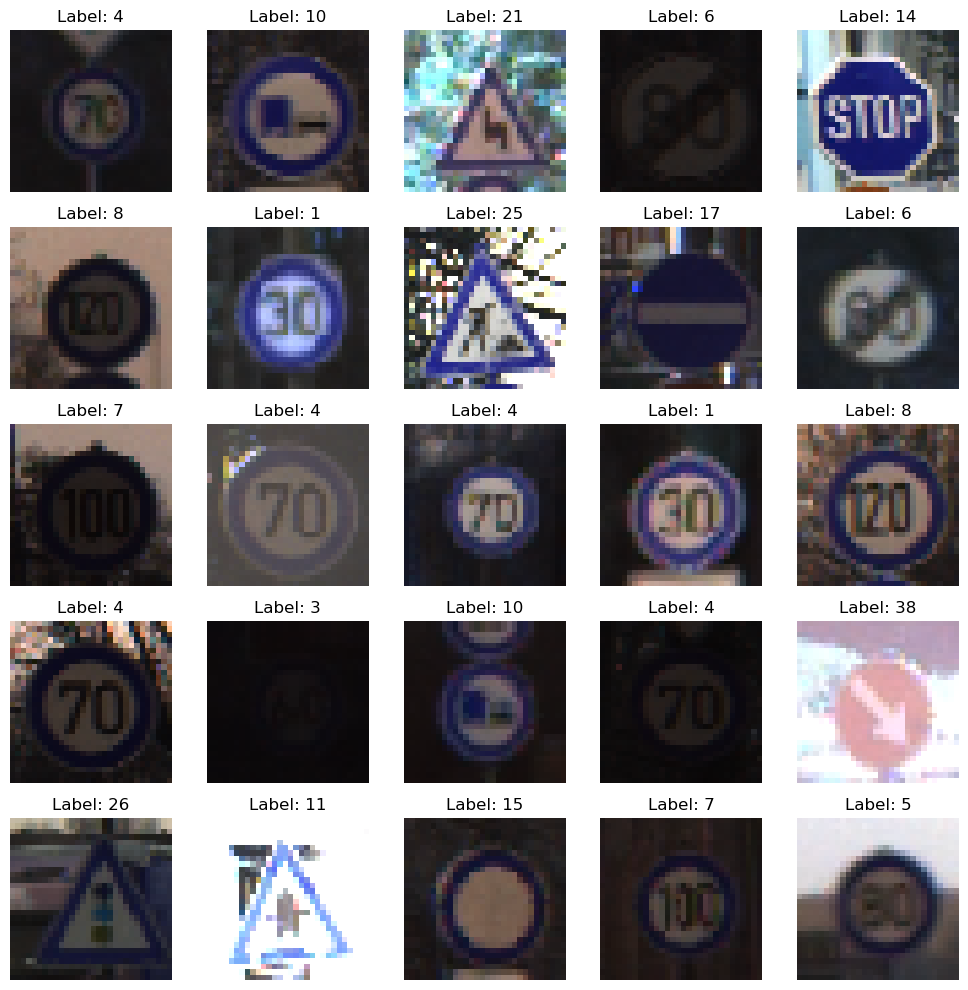

In [70]:
random_indices = random.sample(range(len(train_data)), 25)
# randomly plot 25 images from train_data[]
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        index = random_indices[i * 5 + j]
        # Display the image
        axs[i, j].imshow(train_data[index])
        axs[i, j].axis('off')
        # Display the corresponding label
        axs[i, j].set_title(f"Label: {train_labels[index]}")
plt.tight_layout()
plt.show()


In [71]:
# Converting labels into one hot encoding 
train_labels = to_categorical(train_labels, 43)
test_labels = to_categorical(test_labels, 43)

## Split Train Data

In [72]:
# Normalize pixel values to be between 0 and 1
train_data = train_data / 255.0
# Split the data into training and validation sets (80%, 20%)
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [73]:
# first attempt, please modify 
model = models.Sequential([
    layers.InputLayer(input_shape=(30, 30, 3)), 
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(43, activation='softmax')  # 43 classes
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 256)              

In [74]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
model.save("traffic_sign_model")

Epoch 1/10
981/981 [==============================] - 7s 6ms/step - loss: 0.9870 - accuracy: 0.7216 - val_loss: 0.2275 - val_accuracy: 0.9364
Epoch 2/10
981/981 [==============================] - 5s 5ms/step - loss: 0.1611 - accuracy: 0.9554 - val_loss: 0.1442 - val_accuracy: 0.9555
Epoch 3/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0747 - accuracy: 0.9802 - val_loss: 0.1275 - val_accuracy: 0.9616
Epoch 4/10
981/981 [==============================] - 5s 5ms/step - loss: 0.0505 - accuracy: 0.9852 - val_loss: 0.1414 - val_accuracy: 0.9561
Epoch 5/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0351 - accuracy: 0.9901 - val_loss: 0.0697 - val_accuracy: 0.9824
Epoch 6/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0267 - accuracy: 0.9926 - val_loss: 0.0772 - val_accuracy: 0.9811
Epoch 7/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.0513 - val_accuracy: 0.9865
Epoch 

INFO:tensorflow:Assets written to: traffic_sign_model\assets


INFO:tensorflow:Assets written to: traffic_sign_model\assets


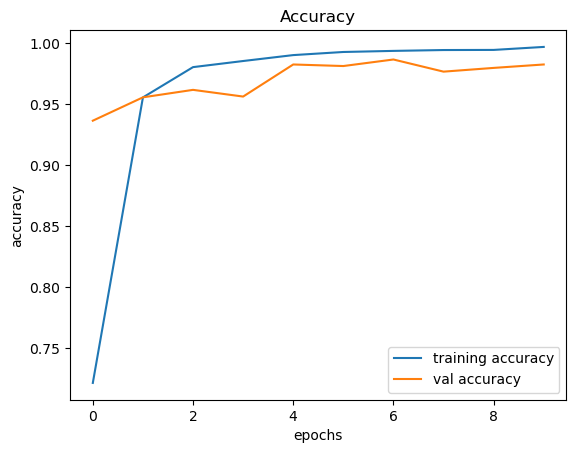

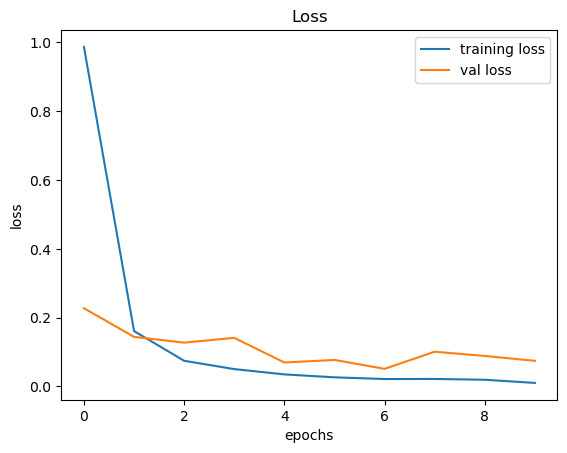

In [78]:
# plotting graphs for accuracy 
# https://github.com/deepak2233/Traffic-Signs-Recognition-using-CNN-Keras/blob/main/Model/Traffic%20Signs%20Recognition%20using%20CNN%20%26%20Keras%20with%2098%25%20Accuracy.ipynb
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss 
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Evaluation

In [87]:
# evaluate on test set
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

def print_metrics(y_true, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=1))

print_metrics(y_true, y_pred)

395/395 [==============================] - 1s 2ms/step
Confusion Matrix:
 [[ 47  13   0 ...   0   0   0]
 [  5 701   6 ...   0   0   0]
 [  0  30 706 ...   0   0   0]
 ...
 [  0   0   0 ...  79   0   0]
 [  0   0   0 ...   0  44   7]
 [  0   1   0 ...   0   1  83]]
Accuracy: 0.8878068091844814
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.78      0.69        60
           1       0.82      0.97      0.89       720
           2       0.76      0.94      0.84       750
           3       0.77      0.76      0.76       450
           4       0.98      0.85      0.91       660
           5       0.81      0.86      0.84       630
           6       0.97      0.74      0.84       150
           7       0.90      0.75      0.82       450
           8       0.85      0.76      0.80       450
           9       0.99      0.89      0.94       480
          10       0.97      0.94      0.96       660
          11       0.74      0.9